In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.8.0
Eager execution: True


In [4]:
train_dataset_fp = tf.keras.utils.get_file(fname= os.path.basename("iris_training.csv") ,
                                           origin="iris_training.csv")

In [5]:
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/ubuntu/.keras/datasets/iris_training.csv


In [6]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [17]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],
    label_name='species',
    num_epochs=1)

In [18]:
features, labels = next(iter(train_dataset))

In [35]:
features

{'petal_length': <tf.Tensor: id=294, shape=(32,), dtype=float32, numpy=
 array([1.5, 5. , 5.8, 5.4, 5.3, 1.5, 5. , 1.4, 5.5, 4.8, 1.6, 1.5, 4.7,
        1.7, 1.3, 4.5, 4.7, 1.2, 4.6, 4.9, 1. , 5.6, 6.4, 1.4, 3.3, 1.6,
        4.5, 6.3, 5.1, 1.3, 1.6, 3. ], dtype=float32)>,
 'petal_width': <tf.Tensor: id=295, shape=(32,), dtype=float32, numpy=
 array([0.3, 1.7, 1.6, 2.3, 2.3, 0.1, 1.9, 0.3, 1.8, 1.4, 0.6, 0.1, 1.4,
        0.3, 0.4, 1.5, 1.6, 0.2, 1.5, 1.8, 0.2, 2.1, 2. , 0.2, 1. , 0.2,
        1.3, 1.8, 1.8, 0.2, 0.2, 1.1], dtype=float32)>,
 'sepal_length': <tf.Tensor: id=296, shape=(32,), dtype=float32, numpy=
 array([5.1, 6.7, 7.2, 6.2, 6.4, 4.9, 6.3, 4.8, 6.5, 6.8, 5. , 4.9, 6.1,
        5.7, 5.4, 6.2, 6.3, 5.8, 6.5, 6.3, 4.6, 6.4, 7.9, 4.4, 5. , 4.8,
        5.7, 7.3, 5.9, 4.4, 4.7, 5.1], dtype=float32)>,
 'sepal_width': <tf.Tensor: id=297, shape=(32,), dtype=float32, numpy=
 array([3.8, 3. , 3. , 3.4, 3.2, 3.1, 2.5, 3. , 3. , 2.8, 3.5, 3.1, 2.9,
        3.8, 3.9, 2.2, 3.3, 4. , 2.

In [25]:
features['petal_length'].numpy()

array([4.5, 4.4, 5.6, 3.8, 1.5, 1.3, 4.5, 1.9, 5.1, 4.1, 1.2, 3.9, 1.6,
       1.3, 4.9, 4.5, 5.3, 5.1, 5.6, 6.1, 3.3, 1.6, 1.4, 1.3, 5.1, 1.5,
       5.5, 5.8, 5.2, 5.6, 1.7, 1.4], dtype=float32)

In [29]:
labels.numpy()

array([2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 0], dtype=int32)

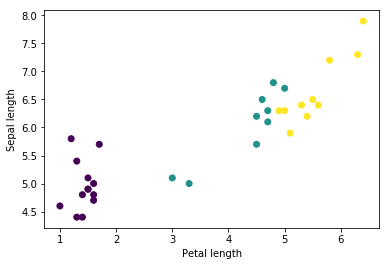

In [34]:
features, labels = next(iter(train_dataset)) # cada llamada ala función de devuelve un grupo nuevo de valores
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [36]:
# etapa de convversión en tensores
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [37]:
train_dataset = train_dataset.map(pack_features_vector)

In [39]:
features, labels = next(iter(train_dataset))

In [54]:
# estas son las caracteristicas en tensores
print("Como tensor: \n",features[:5])
print("y como arreglo: \n", features[:5].numpy())

Como tensor: 
 tf.Tensor(
[[1.  2.4 4.9 3.3]
 [2.  3.8 7.9 6.4]
 [0.2 3.6 4.6 1. ]
 [1.  2.7 5.8 4.1]
 [0.2 3.2 4.6 1.4]], shape=(5, 4), dtype=float32)
y como arreglo: 
 [[1.  2.4 4.9 3.3]
 [2.  3.8 7.9 6.4]
 [0.2 3.6 4.6 1. ]
 [1.  2.7 5.8 4.1]
 [0.2 3.2 4.6 1.4]]


In [55]:
# estas son las etiquetas en tensores
labels[:5]

<tf.Tensor: id=406, shape=(5,), dtype=int32, numpy=array([1, 2, 0, 1, 0], dtype=int32)>

In [56]:
# el modelo

model = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation=tf.nn.relu, input_shape=(4,)),  # input shape required, num of features  
  tf.keras.layers.Dense(12, activation=tf.nn.relu),
  tf.keras.layers.Dense(3) # num of labels
])

In [57]:
# una prueba del modelo

predictions = model(features)
predictions[:5]

<tf.Tensor: id=495, shape=(5, 3), dtype=float32, numpy=
array([[ 2.489653  ,  1.1927984 , -0.74202025],
       [ 4.0379963 ,  2.159785  , -1.2715418 ],
       [ 2.1274235 ,  1.1109865 , -0.55710804],
       [ 2.979609  ,  1.4368594 , -0.8849884 ],
       [ 2.2098846 ,  1.0265758 , -0.5459739 ]], dtype=float32)>

Nos devuelve un LOGIT : Vector de predicciones sin procesar (no normalizadas) que genera un modelo de clasificación, que 
comúnmente se pasa a una función de normalización (activación).
Para convertir estos vectores en probabilidades hay que someterlos a una función de activación (softmax)

In [60]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=513, shape=(5, 3), dtype=float32, numpy=
array([[0.7616832 , 0.20823683, 0.03007991],
       [0.86370146, 0.13202825, 0.00427032],
       [0.6992346 , 0.25304043, 0.04772497],
       [0.80987144, 0.1731444 , 0.01698411],
       [0.7300239 , 0.22357981, 0.04639626]], dtype=float32)>

In [62]:
# este es el resultadp para la pimera fila
tf.nn.softmax(predictions[:1]).numpy()

array([[0.7616832 , 0.20823683, 0.03007991]], dtype=float32)

Claramente se pude ver que la primera categoría es la que tiene más probabilidades = 0.7616832. Con
la función tf.argmax  se verá mucho mejor:

In [66]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 2 0 1 0 1 1 2 2 1 0 1 2 1 1 2 0 0 1 0 2 0 2 0 0 2 1 0 0 1 0 2]


Comparado con categorias reales, parece que no tenemos buenos resultados.... lo que ocurre es que aú no entrenamos nuestro modelo

El entrenamiento es la etapa del aprendizaje automático dende el modelo se optimiza gradualmente, o el modelo aprende del dataset (conjunto de datos). El objetivo es aprender lo suficiente de la estructura del data set de entrenamiento para luego hacer predicciones sobre conjunto de nuevos datos. Si nuestro modelo aprende demasiado sobre el dataset de entrenamiento, entonces las predicciones solo funcionan para los datos que ha visto y no serán generalizables. Este problema se llama overfitting (sobreajuste), es muy parecido a memorizar las respuestas en lugar de entender cómo resolver un problema.

El problema de clasificación de Iris es un ejemplo de aprendizaje automático supervisado: el modelo se entrena a partir de conjunto de datos que contiene las caraseristicas y las etiquetas. En el aprendizaje automático no supervisado, los ejemplos no contienen etiquetas. En su lugar, el modelo normalmente encuentra patrones entre las características.

Definir la función de pérdida y gradiente de desenso.
Tanto las etapas de entrenamiento como las de evaluación se deben calcular la tasa de pérdida del modelo. Esto mide la diferencia entre las predicción de un modelo y de la etiqueta deseada, en otras palabras, qué tan mal está trabajando el modelo. Queremos minimizar, u optimizar, este valor.

Nuestro modelo calculará su pérdida utilizando la función "tf.keras.losses.categorical_crossentropy" que toma las predicciones de probabilidad de clase del modelo y la etiqueta deseada, y devuelve la pérdida promedio en todos los ejemplos.

In [67]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.0853724479675293


Utilizaremos "tf.GradientTape" para calcular los gradientes Y optimizar nuestro modelo.

In [68]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

Crear un optimizador

Un optimizador aplica los gradientes calculados a las variables del modelo para minimizar la función de pérdida. Puede pensar en la función de pérdida como una superficie curva (consulte la Figura 3) y queremos encontrar su punto más bajo caminando. Los gradientes apuntan en la dirección del ascenso más empinado, por lo que viajaremos en sentido contrario y seguiremos subiendo la cuesta. Al calcular de forma iterativa la pérdida y el gradiente de cada lote, ajustaremos el modelo durante el entrenamiento. Gradualmente, el modelo encontrará la mejor combinación de pesos y sesgos para minimizar la pérdida. Y cuanto más baja sea la pérdida, mejores serán las predicciones del modelo.

 Este modelo utiliza el tf.train.GradientDescentOptimizer que implementa el algoritmo de descenso de gradiente estocástico (SGD). La tasa de aprendizaje establece el tamaño de paso que se debe tomar para cada iteración cuesta abajo. Este es un hiperparámetro que comúnmente se ajustará para lograr mejores resultados.

In [72]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.contrib.eager.Variable(0)

In [73]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.0853724479675293
Step: 1,         Loss: 1.5453872680664062


Ciclos de entrenamiento:

¡Con todas las piezas en su lugar, el modelo está listo para el entrenamiento! Un ciclo de entrenamiento alimenta los ejemplos de conjuntos de datos en el modelo para ayudarlo a hacer mejores predicciones. El siguiente bloque de código configura estos pasos de entrenamiento:

Iterar cada época. Una época es un paso por el conjunto de datos.
Dentro de una época, repita cada ejemplo en el conjunto de datos de entrenamiento, capturando sus características (x) y etiqueta (y).
Usando las características del ejemplo, haga una predicción y compárela con la etiqueta. Mida la inexactitud de la predicción y úselo para calcular la pérdida y los gradientes del modelo.
Use un optimizador para actualizar las variables del modelo.
Mantenga un registro de algunas estadísticas para la visualización.
Repita para cada época.
La variable num_epochs es el número de veces que se recorre la colección del conjunto de datos. Contraintuitivamente, entrenar un modelo por más tiempo no garantiza un mejor modelo. num_epochs es un hiperparámetro que puede sintonizar. Elegir el número correcto generalmente requiere experiencia y experimentación.

In [74]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.311, Accuracy: 50.000%
Epoch 050: Loss: 0.330, Accuracy: 93.333%
Epoch 100: Loss: 0.225, Accuracy: 96.667%
Epoch 150: Loss: 0.150, Accuracy: 96.667%
Epoch 200: Loss: 0.143, Accuracy: 97.500%


In [ ]:
# continuar : https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough